# DAVIS dataset self reported height and weight -- EDA

dataset link : https://r-data.pmagunia.com/dataset/r-dataset-package-car-davis 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy.polynomial.polynomial import polyfit

# local data path
dataPath = 'D:/YONG/myPydata/' # 생성위치는 사용자 지정

# define random jitter
def rjitt(arr):
    stdev = .01*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev


# custom min max scaler
def mnmx_scl(vec):
    vec = (vec-vec.min())/(vec.max()-vec.min())
    return(vec)

def zrmx_scl(vec):
    vec = vec/vec.max()
    return(vec)


import matplotlib.font_manager
    
# matplotlib 에서 한글을 표시하기 위한 설정
font_name = matplotlib.font_manager.FontProperties(
                fname="c:/Windows/Fonts/malgun.ttf"  # 윈도우즈의 한글 폰트 위치를 지정
            ).get_name()
matplotlib.rc('font', family=font_name)

matplotlib.rcParams['axes.unicode_minus'] = False #  음수를 나타내는 '-' 부호가 정상 표시되도록


In [2]:
df1 = pd.read_csv(dataPath + 'davis_dataset_14820.csv')
df1.sample(5)

,sex,weight,height,repwt,repht
86,M,62,178,66.0,175.0
19,F,61,175,61.0,171.0
153,F,55,162,NaN,NaN
63,F,78,173,75.0,169.0
96,M,103,185,101.0,182.0


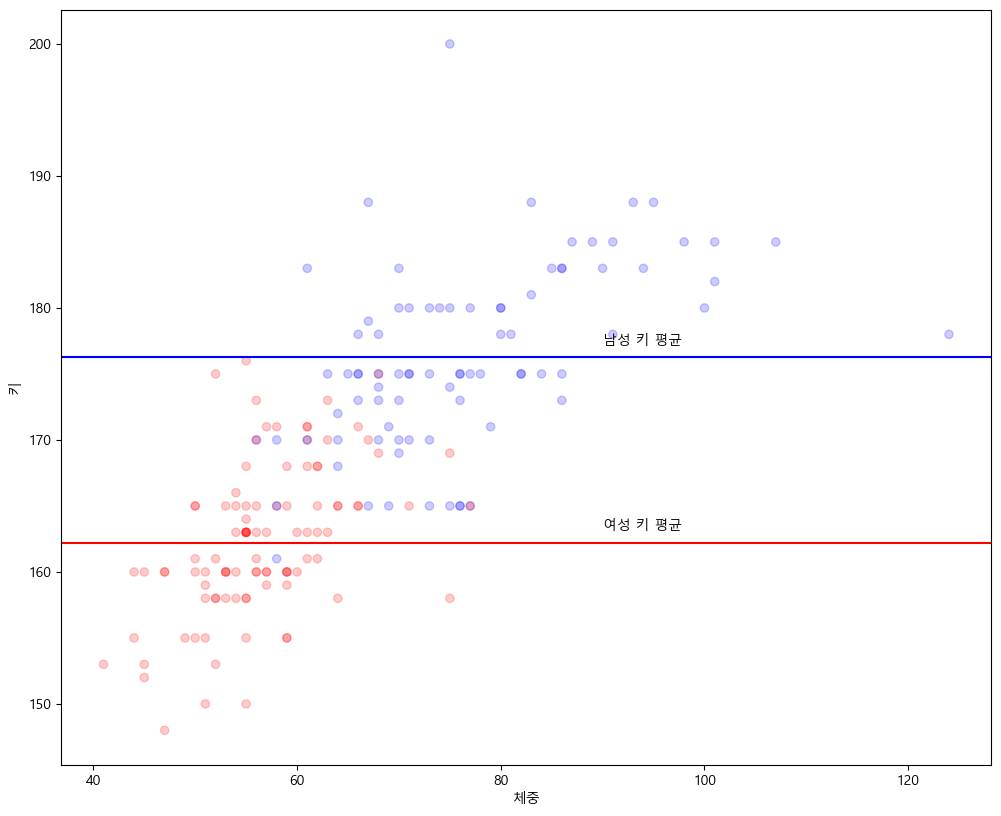

In [3]:
colors1 = np.where(df1.sex=='F', 'red', 'blue')
plt.figure(figsize=(12,10),dpi=100)
plt.scatter(df1.repwt, df1.repht, 
            alpha=0.2, color=colors1)
plt.xlabel('체중')
plt.ylabel('키')
plt.axhline(df1[df1.sex=='F'].repht.mean(), color='red')
plt.axhline(df1[df1.sex=='M'].repht.mean(), color='blue')
plt.text(90,df1[df1.sex=='F'].repht.mean()+1, '여성 키 평균')
plt.text(90,df1[df1.sex=='M'].repht.mean()+1, '남성 키 평균')
plt.show()

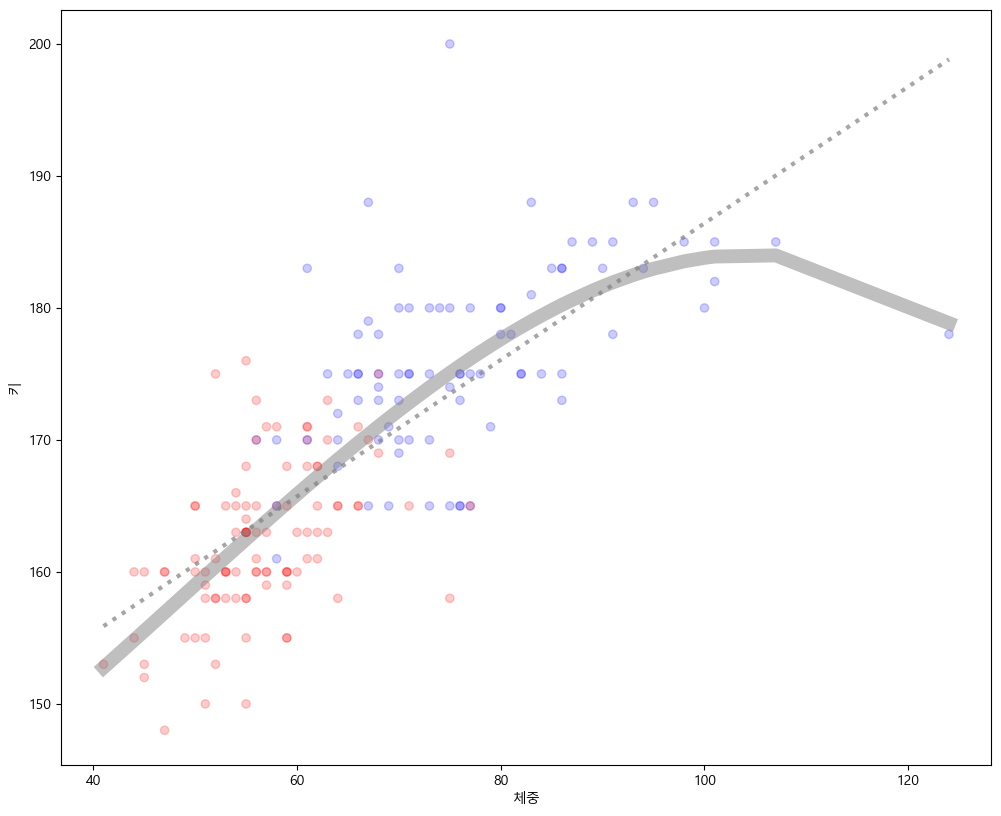

In [4]:
df2 = df1[(~df1.repwt.isna()) & (~df1.repht.isna())]
colors1 = np.where(df2.sex=='F', 'red', 'blue')
plt.figure(figsize=(12,10),dpi=100)
plt.scatter(df2.repwt, df2.repht, 
            alpha=0.2, color=colors1)
plt.xlabel('체중')
plt.ylabel('키')
varx = df2.repwt
vary = df2.repht
plt.plot(np.unique(varx), np.poly1d(np.polyfit(varx, vary, 3))(np.unique(varx)), 
         color='grey', linewidth=10, alpha=0.5)
plt.plot(np.unique(varx), np.poly1d(np.polyfit(varx, vary, 1))(np.unique(varx)), 
         color='grey', linewidth=3, alpha=0.7, linestyle=':')
plt.show()




In [5]:
df1.isna().sum()

sex        0
weight     0
height     0
repwt     17
repht     17
dtype: int64

### scaling

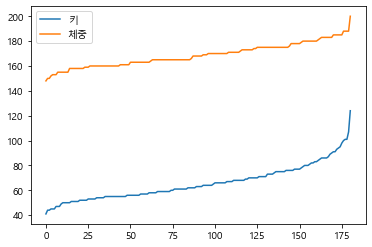

In [6]:
plt.plot(np.sort(df2.repwt))
plt.plot(np.sort(df2.repht))
plt.legend(['키', '체중'])
plt.show()

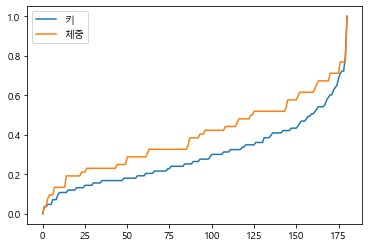

In [7]:
plt.plot(np.sort(mnmx_scl(df2.repwt)))
plt.plot(np.sort(mnmx_scl(df2.repht)))
plt.legend(['키', '체중'])
plt.show()

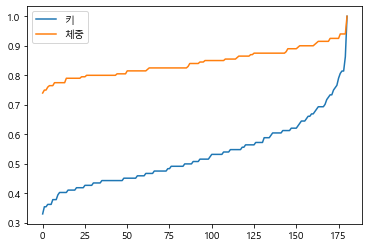

In [8]:
plt.plot(np.sort(zrmx_scl(df2.repwt)))
plt.plot(np.sort(zrmx_scl(df2.repht)))
plt.legend(['키', '체중'])
plt.show()

## 이상값 발견 및 보정

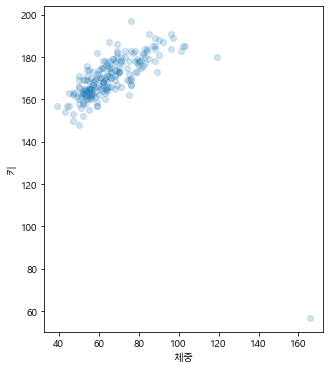

,sex,weight,height,repwt,repht
11,F,166,57,56.0,163.0


In [9]:
plt.figure(figsize=(5,6))
plt.scatter(df1.weight, df1.height, alpha=0.2)
plt.ylabel('키')
plt.xlabel('체중')
plt.show()

display(df1[df1.height<100])

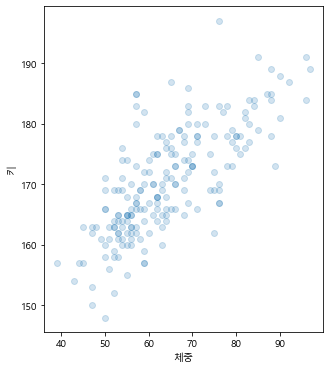

In [10]:
df102 = df1.copy()
df102['weight'] = np.where(df102['weight']>100,57,df102['weight'])
df102['height'] = np.where(df102['height']<100,166,df102['height'])

plt.figure(figsize=(5,6))
plt.scatter(df102.weight, df102.height, alpha=0.2)
plt.ylabel('키')
plt.xlabel('체중')
plt.show()

### MSE MAE 계산

[1.01787987] -5.126340170334515


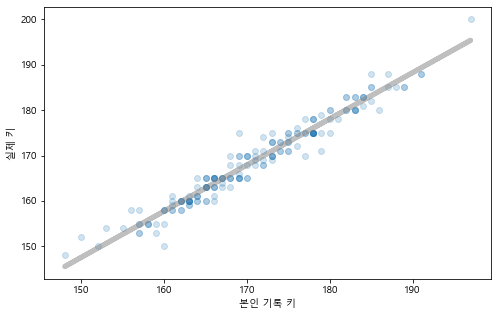

(2.076502732240454, 4.338051533189137)

In [11]:
df102 = df102[~(df102.height.isna()) & ~(df102.repht.isna())]
plt.figure(figsize=(8,5))
plt.scatter(df102.height, df102.repht, alpha=0.2)
plt.ylabel('실제 키')
plt.xlabel('본인 기록 키')



from sklearn.linear_model import LinearRegression

varx = np.array(df102.height).reshape(-1,1)
vary = df102.repht
reg = LinearRegression().fit(varx, vary)
print(reg.coef_ , reg.intercept_ )
predy = reg.predict(varx)
plt.plot(varx, predy, color='grey', alpha=0.5, linewidth=5)

plt.show()

MAE = abs(df102.height - predy).mean()
MSE = ((df102.height - predy)**2).mean()
MAE, MSE